In [278]:
import pandas as pd
import matplotlib.pyplot as plt

df_city_day = pd.read_csv('data/city_day.csv')
df_station_day = pd.read_csv('data/station_day.csv')
df_stations = pd.read_csv('data/stations.csv')

In [279]:
def plot_bar(ax, data, title, rotation=90, color_map=None):
    """
    Plot a bar chart given the axes
    """
    if color_map:
        if isinstance(color_map, dict):
            colors = [color_map.get(idx, 'tab:blue') for idx in data.index]
        elif callable(color_map):
            colors = [color_map(idx) for idx in data.index]
        else:
            raise ValueError("color_map deve ser um dicionário ou função.")
    else:
        colors = 'tab:blue'

    ax.bar(data.index, data.values, color=colors)
    ax.set_title(title)
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels(data.index, rotation=rotation)

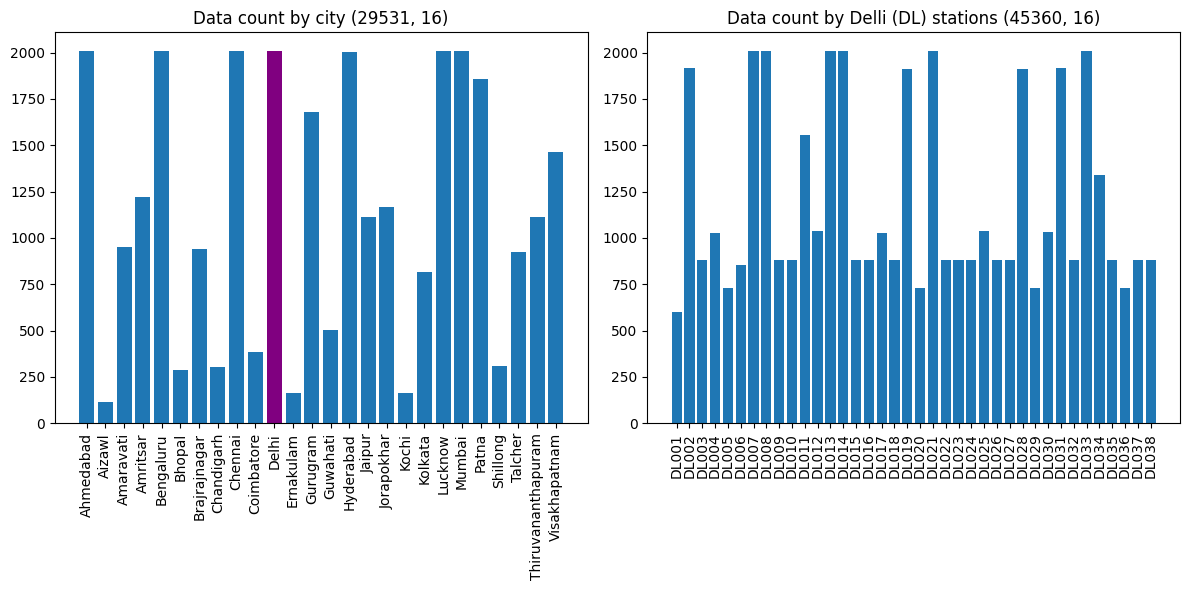

In [280]:
df_city_count = df_city_day.groupby('City')['Date'].count()
df_station_day_dl = df_station_day[df_station_day['StationId'].str.contains('DL')]
df_station_count_dl = df_station_day_dl.groupby('StationId')['Date'].count()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot_bar(ax[0], df_city_count, f"Data count by city {df_city_day.shape}", color_map={'Delhi' : 'purple'})
plot_bar(ax[1], df_station_count_dl, f"Data count by Delli (DL) stations {df_station_day_dl.shape}")

plt.tight_layout()
plt.show()


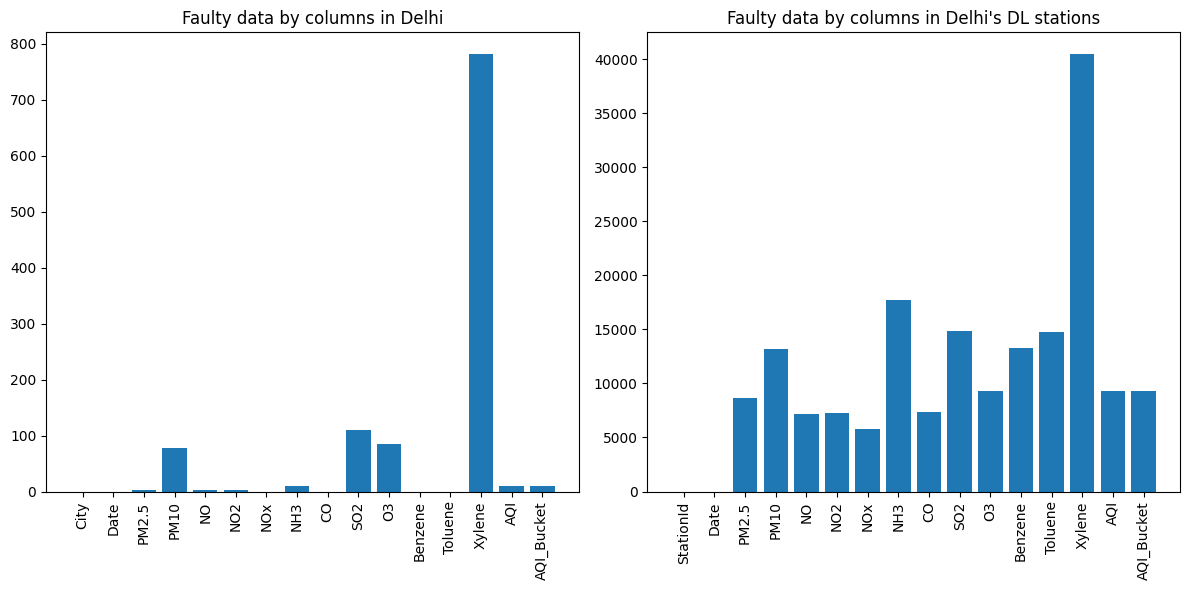

In [281]:
import matplotlib.pyplot as plt

df_city_day_delli = df_city_day[df_city_day['City'] == 'Delhi']
df_city_day_delli_sum = df_city_day_delli.isnull().sum()
df_station_day_dl_sum = df_station_day_dl.isnull().sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot_bar(ax[0], df_city_day_delli_sum, "Faulty data by columns in Delhi")
plot_bar(ax[1], df_station_day_dl_sum, "Faulty data by columns in Delhi's DL stations")

plt.tight_layout()
plt.show()


> AQI (Escala do Índice de Qualidade do Ar) 

Observações
- Ao fazer análises dos poluentes, evitar o Xylene por ter muitos dados faltantes na cidade e nas estações de Delhi, como visualizado acima

Possíveis análises
- Usar uma série temporal para analisar como o AQI da cidade de Delhi evoluiu de 2015 a 2020
- Verificar a correlação entre o AQI e os poluentes na cidade e estações de Delhi
- Obter um score de AQI para cada estado da India conhecido neste dataset (realizar um join com a coluna `state` do arquivo stations.csv)